<a href="https://colab.research.google.com/github/claudio-iturra/software/blob/main/salar.maricunga-map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Salar Maricunga Map

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 55.0 MB/s eta 0:00:00


In [ ]:
# Colab: install system libs Cartopy needs
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev libgeos++-dev > /dev/null

# Install cartopy (binary wheels in colab are sometimes old, so force install)
!pip install --quiet cartopy shapely pyproj


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

# custom satellite basemap (Esri World Imagery)
class EsriWorldImagery(cimgt.GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        # Esri World Imagery WMTS-style URL
        return (
            f"https://services.arcgisonline.com/ArcGIS/rest/services/"
            f"World_Imagery/MapServer/tile/{z}/{y}/{x}"
        )


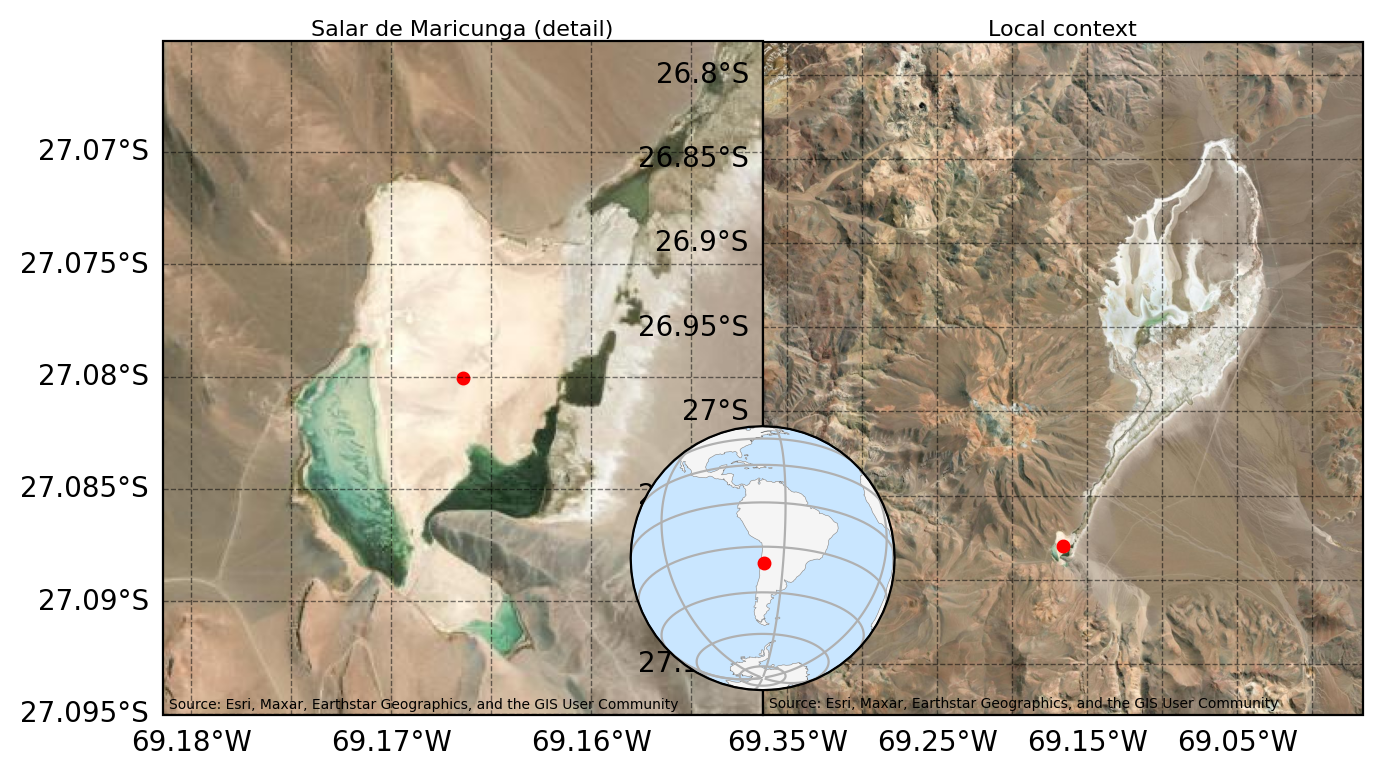

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from shapely.geometry import box

# ---------------------------------------
# Esri satellite tiles
class EsriWorldImagery(cimgt.GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        return (
            "https://services.arcgisonline.com/ArcGIS/rest/services/"
            f"World_Imagery/MapServer/tile/{z}/{y}/{x}"
        )

# center
lat_c = -27.080062
lon_c = -69.166442

# left = very zoomed
extent_small = [
    lon_c - 0.015, lon_c + 0.015,
    lat_c - 0.015, lat_c + 0.015,
]

# right = wider
extent_big = [
    lon_c - 0.2, lon_c + 0.2,
    lat_c - 0.1, lat_c + 0.3,
]

tiler = EsriWorldImagery()
crs_tiles = tiler.crs

# ---------------------------------------
fig = plt.figure(figsize=(6, 6), dpi=200)

# no space anywhere
fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0,
                    wspace=0.0, hspace=0.0)

# LEFT subplot (0–0.5)
ax1 = plt.subplot(1, 2, 1, projection=crs_tiles)
ax1.set_extent(extent_small, crs=ccrs.PlateCarree())
ax1.add_image(tiler, 14)
ax1.plot(lon_c, lat_c, "o", color="red", markersize=4,
         transform=ccrs.PlateCarree())

gl1 = ax1.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=0.5, color="black", alpha=0.5, linestyle="--",
)
gl1.xformatter = cticker.LongitudeFormatter()
gl1.yformatter = cticker.LatitudeFormatter()
gl1.top_labels = False
gl1.right_labels = False

ax1.text(0.01, 0.01,
         "Source: Esri, Maxar, Earthstar Geographics, and the GIS User Community",
         transform=ax1.transAxes, fontsize=5)

ax1.set_title("Salar de Maricunga (detail)", fontsize=8, pad=2)

# RIGHT subplot (0.5–1)
ax2 = plt.subplot(1, 2, 2, projection=crs_tiles)
ax2.set_extent(extent_big, crs=ccrs.PlateCarree())
ax2.add_image(tiler, 12)
ax2.plot(lon_c, lat_c, "o", color="red", markersize=4,
         transform=ccrs.PlateCarree())

gl2 = ax2.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=0.5, color="black", alpha=0.5, linestyle="--",
)
gl2.xformatter = cticker.LongitudeFormatter()
gl2.yformatter = cticker.LatitudeFormatter()
gl2.top_labels = False
gl2.right_labels = False

ax2.text(0.01, 0.01,
         "Source: Esri, Maxar, Earthstar Geographics, and the GIS User Community",
         transform=ax2.transAxes, fontsize=5)

ax2.set_title("Local context", fontsize=8, pad=2)

# ---------------------------------------
# BIG GLOBE centered over both panels
# figure coordinates: x=0.5 (center horizontally), y=0.5 (center vertically)
# width/height ~ 0.28 of figure — tweak to taste
globe_size = 0.22
inax = fig.add_axes(
    [0.5 - globe_size/2, 0.35 - globe_size/2, globe_size, globe_size],
    projection=ccrs.Orthographic(central_longitude=-70, central_latitude=-25)
)

inax.set_global()
inax.add_feature(cfeature.OCEAN, facecolor="#c9e6ff", zorder=0)
inax.add_feature(cfeature.LAND, facecolor="#f5f5f5",
                 edgecolor="gray", linewidth=0.2, zorder=1)

# point on globe
inax.plot(lon_c, lat_c, "o",
          transform=ccrs.PlateCarree(),
          markersize=4, color="red", zorder=5)

# show the SMALL extent on the globe
small_poly = box(extent_small[0], extent_small[2],
                 extent_small[1], extent_small[3])
inax.add_geometries(
    [small_poly],
    crs=ccrs.PlateCarree(),
    edgecolor="red", facecolor="none",
    linewidth=0.6, zorder=4
)

# remove labels on inset
inax.gridlines(draw_labels=False)

# draw circular frame
circle = mpatches.Circle(
    (0.5, 0.5), 0.5,
    transform=inax.transAxes,
    fill=False,
    edgecolor="black",
    linewidth=0.6,
    zorder=10,
)
inax.add_patch(circle)

plt.show()


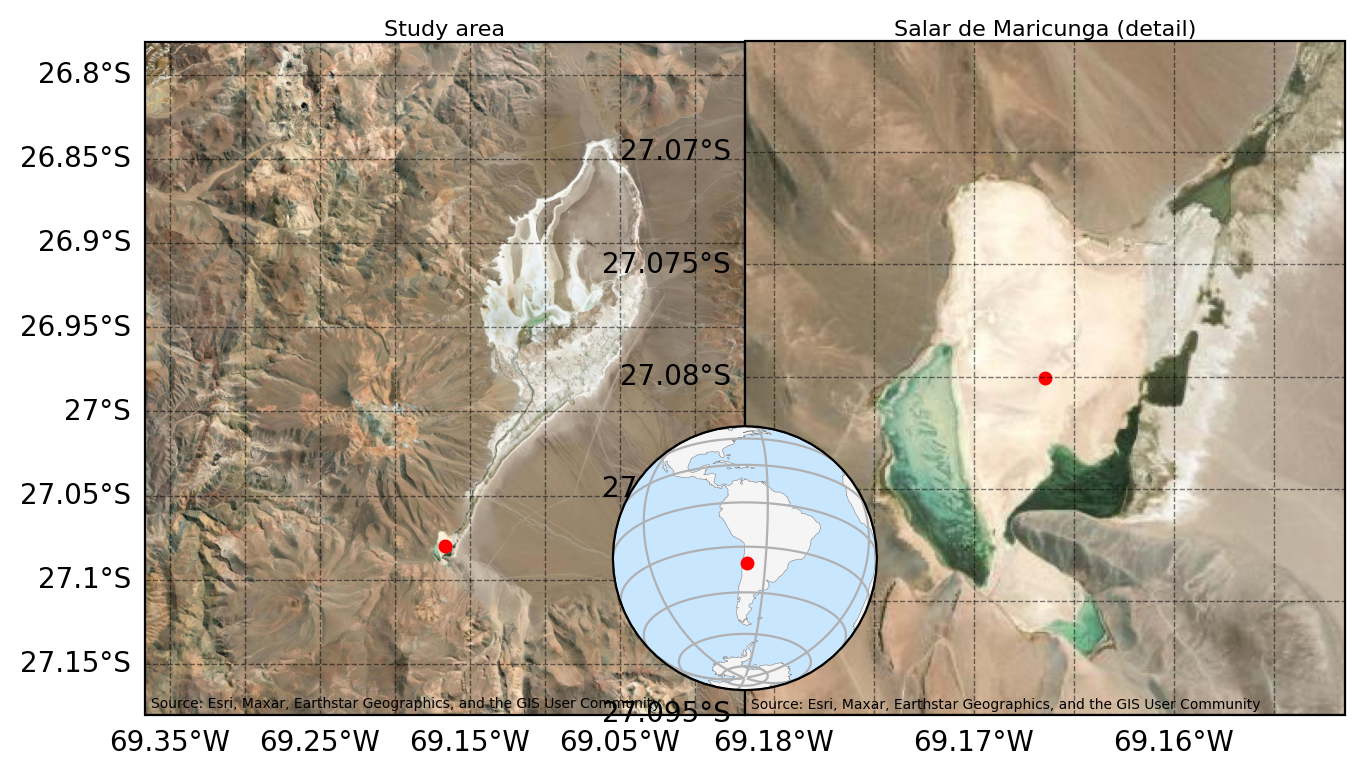

In [79]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from shapely.geometry import box

# ---------------------------------------
# Esri satellite tiles
class EsriWorldImagery(cimgt.GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        return (
            "https://services.arcgisonline.com/ArcGIS/rest/services/"
            f"World_Imagery/MapServer/tile/{z}/{y}/{x}"
        )

# center
lat_c = -27.080062
lon_c = -69.166442

# small (detail) extent
extent_small = [
    lon_c - 0.015, lon_c + 0.015,
    lat_c - 0.015, lat_c + 0.015,
]

# big (context) extent
extent_big = [
    lon_c - 0.2, lon_c + 0.2,
    lat_c - 0.1, lat_c + 0.3,
]

tiler = EsriWorldImagery()
crs_tiles = tiler.crs

fig = plt.figure(figsize=(6, 6), dpi=200)

# no space anywhere
fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0,
                    wspace=0.0, hspace=0.0)

# ---------------------------------------
# LEFT subplot = BIG / CONTEXT
ax1 = plt.subplot(1, 2, 1, projection=crs_tiles)
ax1.set_extent(extent_big, crs=ccrs.PlateCarree())
ax1.add_image(tiler, 12)
ax1.plot(lon_c, lat_c, "o", color="red", markersize=4,
         transform=ccrs.PlateCarree())

gl1 = ax1.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=0.5, color="black", alpha=0.5, linestyle="--",
)
gl1.xformatter = cticker.LongitudeFormatter()
gl1.yformatter = cticker.LatitudeFormatter()
gl1.top_labels = False
gl1.right_labels = False

ax1.text(0.01, 0.01,
         "Source: Esri, Maxar, Earthstar Geographics, and the GIS User Community",
         transform=ax1.transAxes, fontsize=5)

ax1.set_title("Study area", fontsize=8, pad=2)

# ---------------------------------------
# RIGHT subplot = SMALL / DETAIL
ax2 = plt.subplot(1, 2, 2, projection=crs_tiles)
ax2.set_extent(extent_small, crs=ccrs.PlateCarree())
ax2.add_image(tiler, 14)
ax2.plot(lon_c, lat_c, "o", color="red", markersize=4,
         transform=ccrs.PlateCarree())

gl2 = ax2.gridlines(
    crs=ccrs.PlateCarree(), draw_labels=True,
    linewidth=0.5, color="black", alpha=0.5, linestyle="--",
)
gl2.xformatter = cticker.LongitudeFormatter()
gl2.yformatter = cticker.LatitudeFormatter()
gl2.top_labels = False
gl2.right_labels = False

ax2.text(0.01, 0.01,
         "Source: Esri, Maxar, Earthstar Geographics, and the GIS User Community",
         transform=ax2.transAxes, fontsize=5)

ax2.set_title("Salar de Maricunga (detail)", fontsize=8, pad=2)

# ---------------------------------------
# BIG GLOBE centered over both panels
globe_size = 0.22
inax = fig.add_axes(
    [0.5 - globe_size/2, 0.35 - globe_size/2, globe_size, globe_size],
    projection=ccrs.Orthographic(central_longitude=-70, central_latitude=-25)
)

inax.set_global()
inax.add_feature(cfeature.OCEAN, facecolor="#c9e6ff", zorder=0)
inax.add_feature(cfeature.LAND, facecolor="#f5f5f5",
                 edgecolor="gray", linewidth=0.2, zorder=1)

# point on globe
inax.plot(lon_c, lat_c, "o",
          transform=ccrs.PlateCarree(),
          markersize=4, color="red", zorder=5)

# show the SMALL extent on the globe
small_poly = box(extent_small[0], extent_small[2],
                 extent_small[1], extent_small[3])
inax.add_geometries(
    [small_poly],
    crs=ccrs.PlateCarree(),
    edgecolor="red", facecolor="none",
    linewidth=0.6, zorder=4
)

inax.gridlines(draw_labels=False)

circle = mpatches.Circle(
    (0.5, 0.5), 0.5,
    transform=inax.transAxes,
    fill=False,
    edgecolor="black",
    linewidth=0.6,
    zorder=10,
)
inax.add_patch(circle)

plt.show()
